In [1]:
import time
import numpy as np
import pickle
import awkward as ak
import dask_awkward as dak
from distributed import Client
from omegaconf import OmegaConf

from typing import Tuple, List, Dict
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [72]:
load_path = f"/work/users/yun79/stage2_output/test/ggh/2018/processed_events_dyMC.parquet"
processed_events = ak.from_parquet(load_path)
region = processed_events.h_peak != 0
bkg = ak.to_numpy(processed_events.BDT_score[region])
bkg_label = np.zeros_like(bkg)
load_path = f"/work/users/yun79/stage2_output/test/ggh/2018/processed_events_signalMC.parquet"
processed_events = ak.from_parquet(load_path)
region = processed_events.h_peak != 0
sig = ak.to_numpy(processed_events.BDT_score[region])
sig_label = np.ones_like(sig)
print(bkg)
print(sig)
pred = np.concatenate((bkg,sig), axis=0)
label = np.concatenate((bkg_label,sig_label), axis=0)
print(pred.shape)
print(label.shape)

[0.4106679  0.41821906 0.40837929 ... 0.1707716  0.2874001  0.41762409]
[0.3470872  0.23771317 0.26845881 ... 0.46936545 0.80992007 0.17565446]
(6102943,)
(6102943,)


In [73]:
fpr, tpr, thresholds = roc_curve(label, pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(label, pred)

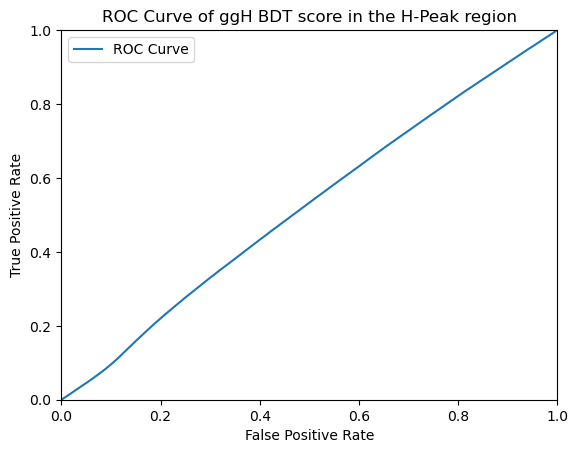

In [75]:
plt.figure()  
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of ggH BDT score in the H-Peak region')
plt.legend()
plt.show()

/depot/cms/kernels/root632/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


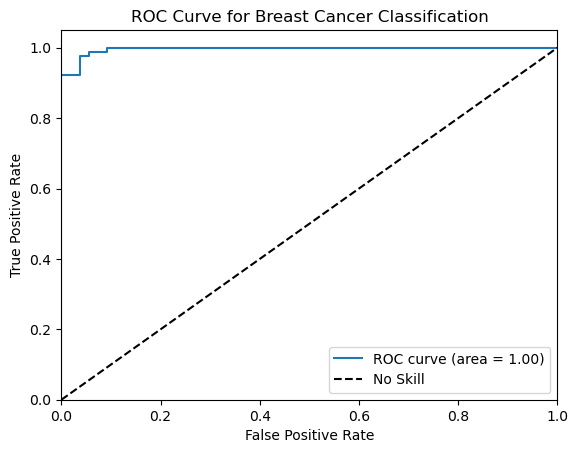

In [52]:
#taken from https://www.geeksforgeeks.org/how-to-plot-roc-curve-in-python/#

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


data = load_breast_cancer()
X = data.data
y = data.target # Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression() 
model.fit(X_train, y_train)
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()


np.sum(FPR_total ==-99) : 0
np.sum(TPR_total ==-99) : 0


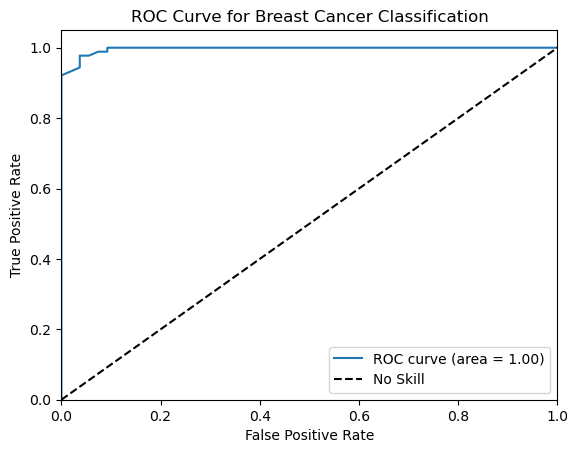

In [53]:
fpr, tpr, thresholds = customROC_curve(y_test, y_pred_proba, np.ones_like(y_test)) 
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

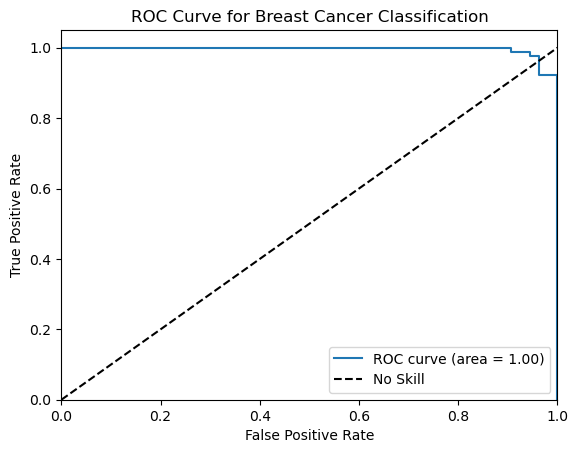

In [35]:
plt.figure()  
plt.plot((1-fpr), tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

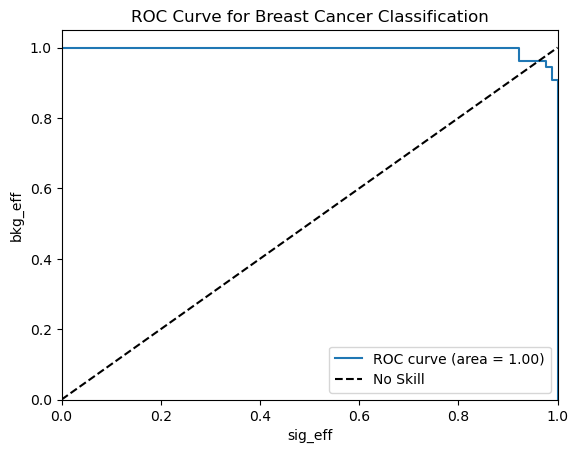

In [34]:
plt.figure()  
sig_eff = tpr
bkg_eff = (1-fpr)
plt.plot(sig_eff, bkg_eff, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('sig_eff')
plt.ylabel('bkg_eff')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()

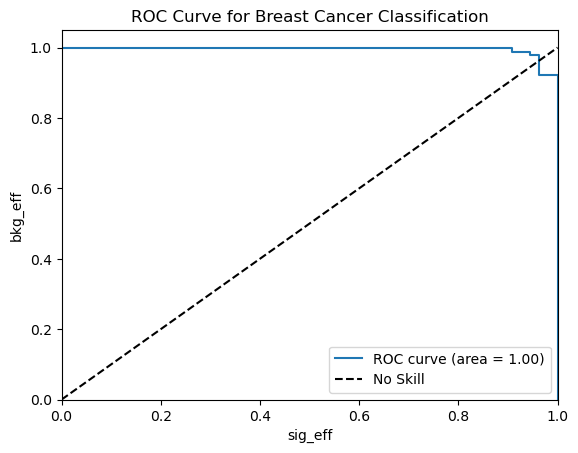

In [37]:
plt.figure()  
sig_eff = tpr
bkg_eff = (1-fpr)
plt.plot(bkg_eff, sig_eff, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('sig_eff')
plt.ylabel('bkg_eff')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()

In [103]:
"""
Let's try VBF DNN
"""
load_path = f"/work/users/yun79/stage2_output/test/vbf/2018/processed_events_bkgMC*.parquet"
processed_events = ak.from_parquet(load_path)
region = processed_events.h_peak != 0
# DNN_score_raw is a sigmoid output
bkg = (ak.to_numpy(processed_events.DNN_score_sigmoid[region]))
bkg_wgt = (ak.to_numpy(processed_events.wgt_nominal_total[region]))
bkg_label = 0*np.ones_like(bkg)
load_path = f"/work/users/yun79/stage2_output/test/vbf/2018/processed_events_sigMC*.parquet"
processed_events = ak.from_parquet(load_path)
region = processed_events.h_peak != 0
sig = (ak.to_numpy(processed_events.DNN_score_sigmoid[region]))
sig_wgt = (ak.to_numpy(processed_events.wgt_nominal_total[region]))
sig_label = np.ones_like(sig)
print(np.min(bkg))
print(np.max(bkg))
print(np.min(sig))
print(np.max(sig))
print(bkg.shape)
print(sig.shape)
pred = np.concatenate((bkg,sig), axis=0)
wgt_total = np.concatenate((bkg_wgt,sig_wgt), axis=0)
label = np.concatenate((bkg_label,sig_label), axis=0)
print(pred.shape)
print(wgt_total.shape)
print(label.shape)

0.013394518755376339
0.8663160800933838
0.01716175116598606
0.9038218259811401
(113024,)
(496867,)
(609891,)
(609891,)
(609891,)


In [110]:
print(np.sum(bkg_wgt))
print(np.sum(sig_wgt))

4449.2340562405525
21.51148151970694


In [107]:
print(np.min(label))
print(np.min(pred))
print(np.min(wgt_total))
print(np.max(wgt_total))

0.0
0.013394518755376339
-0.8266686379272989
0.895079498164366


In [ ]:
def customROC_curve(label, pred, weight):
    # we assume sigmoid output with labels 0 = background, 1 = signal
    thresholds = np.linspace(start=0,stop=1, num=50) 
    FPR_total = -99*np.ones_like(thresholds) # FPR = false positive rate
    TPR_total = -99*np.ones_like(thresholds) # TPR = true positive rate
    for ix in range(len(thresholds)):
        threshold = thresholds[ix]
        # get FP and TP
        positive_filter = (pred > threshold)
        falsePositive_filter = positive_filter & (label == 0)
        FP = np.sum(weight[falsePositive_filter])#  FP = false positive
        truePositive_filter = positive_filter & (label == 1)
        TP = np.sum(weight[truePositive_filter])#  TP = true positive
        

        # get TN and FN
        negative_filter = (pred <= threshold) # just picked negative to be <=
        trueNegative_filter = negative_filter & (label == 0)
        TN = np.sum(weight[trueNegative_filter])#  TN = true negative
        falseNegative_filter = negative_filter & (label == 1)
        FN = np.sum(weight[falseNegative_filter])#  FN = false negative

        

        FPR = FP / (FP + TN)
        TPR = TP / (TP + FN)
        FPR_total[ix] = FPR
        TPR_total[ix] = TPR

        # sanity check
        assert ((np.sum(positive_filter) + np.sum(negative_filter)) == len(pred))
        total_yield = FP + TP + FN + TN
        assert(total_yield == np.sum(weight))
        print(f"total_yield: {total_yield}")
        print(f"np.sum(weight): {np.sum(weight)}")
    print(f"np.sum(FPR_total ==-99) : {np.sum(FPR_total ==-99)}")
    print(f"np.sum(TPR_total ==-99) : {np.sum(TPR_total ==-99)}")
    return (FPR_total, TPR_total, thresholds)



In [116]:
fpr, tpr, thresholds = customROC_curve(label, pred, wgt_total)

print(f"fpr: {fpr}")
print(f"tpr: {tpr}")
plt.figure()  
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for VBF DNN 2018')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

AssertionError: 

In [8]:
processed_events.fields

['dimuon_mass',
 'DNN_score',
 'DNN_score_sigmoid',
 'wgt_nominal_total',
 'h_peak',
 'h_sidebands']

In [11]:
! ls /work/users/yun79/stage2_output/test/vbf/2018/

processed_events_bkgMC_dy.parquet   processed_events_sigMC_ggh.parquet
processed_events_bkgMC_ewk.parquet  processed_events_sigMC_vbf.parquet


In [21]:
# load_path = f"/work/users/yun79/stage2_output/test/vbf/2018/processed_events_sigMC_ggh.parquet"
# processed_events = ak.from_parquet(load_path)
# print(len(processed_events))
# load_path = f"/work/users/yun79/stage2_output/test/vbf/2018/processed_events_sigMC_vbf.parquet"
# processed_events = ak.from_parquet(load_path)
# print(len(processed_events))

In [97]:
# from sklearn.utils.class_weight import compute_sample_weight
# wgt_total = compute_sample_weight(class_weight='balanced', y=label)



np.sum(FPR_total ==-99) : 0
np.sum(TPR_total ==-99) : 0


In [95]:
def customROC_curveV2(label, pred, weight):
    # we assume sigmoid output with labels 0 = background, 1 = signal
    thresholds = np.linspace(start=0,stop=1, num=50) 
    effBkg_total = -99*np.ones_like(thresholds) # FPR = false positive rate
    effSig_total = -99*np.ones_like(thresholds) # TPR = true positive rate
    for ix in range(len(thresholds)):
        threshold = thresholds[ix]
        # get FP and TP
        positive_filter = (pred > threshold)
        falsePositive_filter = positive_filter & (label == 0)
        FP = np.sum(weight[falsePositive_filter])#  FP = false positive
        truePositive_filter = positive_filter & (label == 1)
        TP = np.sum(weight[truePositive_filter])#  TP = true positive
        

        # get TN and FN
        negative_filter = (pred <= threshold) # just picked negative to be <=
        trueNegative_filter = negative_filter & (label == 0)
        TN = np.sum(weight[trueNegative_filter])#  TN = true negative
        falseNegative_filter = negative_filter & (label == 1)
        FN = np.sum(weight[falseNegative_filter])#  FN = false negative


        effBkg = TN / (FP + TN)
        effSig = TP / (TP + FN)

        # print(f"threshold: {threshold}")
        # print(f"weight[trueNegative_filter]: {weight[trueNegative_filter]}")
        # print(f"TN: {TN}")
        # print(f"FP: {FP}")
        # print(f"effBkg: {effBkg}")
        # print(f"FP: {FP}")
        # print(f"TP: {TP}")
        # print(f"effSig: {effSig}")
        effBkg_total[ix] = effBkg
        effSig_total[ix] = effSig
    # print(f"np.sum(effBkg_total ==-99) : {np.sum(effBkg_total ==-99)}")
    # print(f"np.sum(effSig_total ==-99) : {np.sum(effSig_total ==-99)}")
    return (effBkg_total, effSig_total, thresholds)


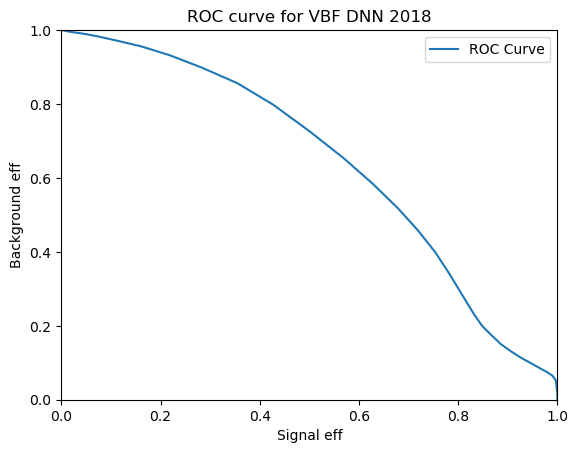

In [96]:

eff_bkg, eff_sig, thresholds = customROC_curveV2(label, pred, wgt_total)
plt.figure()  
plt.plot(eff_sig, eff_bkg, label="ROC Curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Signal eff')
plt.ylabel('Background eff')
plt.title('ROC curve for VBF DNN 2018')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

In [67]:
eff_bkg

array([-0.78552968, -0.76042245, -0.75899402, -0.74843063, -0.66405841,
        0.02090785,  0.47084822,  0.6968811 ,  0.81621021,  0.87949395,
        0.91662862,  0.94126001,  0.9581023 ,  0.96793395,  0.9755477 ,
        0.9812063 ,  0.98588977,  0.98905122,  0.99089651,  0.99268344,
        0.99420133,  0.99485613,  0.99623652,  0.99716655,  0.99759536,
        0.99781689,  0.99839924,  0.99864177,  0.99876793,  0.99889919,
        0.9991725 ,  0.9991725 ,  0.9991725 ,  0.99932307,  0.99947734,
        0.99963598,  0.99979882,  0.99979882,  0.99979882,  0.99979882,
        0.99979882,  0.99979882,  0.99979882,  0.99979882,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [62]:
tpr

array([1.00048726, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [42]:
thresholds = np.linspace(start=0,stop=1, num=50)

In [43]:
thresholds

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])